In [1]:
import cv2
import matplotlib.pyplot as plt

# 字符分割函數
def segment_characters(image_path):
    # 讀取圖像並轉為灰階
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    _, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # 尋找輪廓
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # 篩選合適大小的輪廓（避免雜訊）
    char_contours = [cnt for cnt in contours if 50 < cv2.boundingRect(cnt)[2] < 100 and cv2.boundingRect(cnt)[3] > 50]
    
    # 將輪廓根據 x 座標排序
    char_contours = sorted(char_contours, key=lambda x: cv2.boundingRect(x)[0])
    
    # 分割字符並顯示
    characters = []
    for i, cnt in enumerate(char_contours):
        x, y, w, h = cv2.boundingRect(cnt)
        char_image = binary[y:y+h, x:x+w]
        resized_char = cv2.resize(char_image, (64, 64))  # 調整大小
        characters.append(resized_char)
        
        # 顯示每個字符的分割結果
        plt.subplot(1, len(char_contours), i + 1)
        plt.imshow(resized_char, cmap='gray')
        plt.axis('off')

    plt.show()
    return characters

# 測試字符分割
plate_image_path = 'assember8.jpg'  # 替換為車牌圖像的路徑
characters = segment_characters(plate_image_path)
print(f"Number of characters segmented: {len(characters)}")


Number of characters segmented: 0


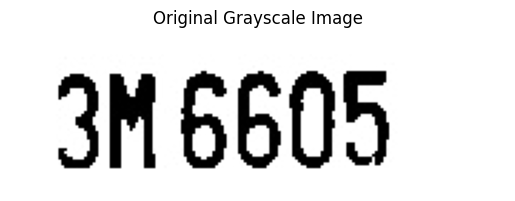

In [2]:
import cv2
import matplotlib.pyplot as plt

# 讀取圖像並轉為灰階
image_path = 'assember8.jpg'  # 替換為實際圖像路徑
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 顯示圖像
plt.imshow(image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')
plt.show()


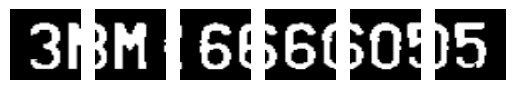

Number of characters segmented: 6


In [19]:
import cv2
import matplotlib.pyplot as plt

# 字符分割函數
def segment_characters(image_path, padding=10):
    # 讀取圖像並轉為灰階
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        raise FileNotFoundError(f"Cannot load image at path: {image_path}")
    
    # 自適應二值化
    _, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # 尋找輪廓
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # 篩選適當的輪廓
    char_contours = []
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        if 10 < w < 150 and 30 < h < 200:  # 調整篩選條件以適應字符大小
            char_contours.append((x, y, w, h))
    
    # 將輪廓根據 x 座標排序
    char_contours = sorted(char_contours, key=lambda x: x[0])
    
    # 分割字符並顯示
    characters = []
    for i, (x, y, w, h) in enumerate(char_contours):
        # 向外擴展邊界
        x_expanded = max(x - padding, 0)
        y_expanded = max(y - padding, 0)
        w_expanded = min(w + 2 * padding, binary.shape[1] - x_expanded)
        h_expanded = min(h + 2 * padding, binary.shape[0] - y_expanded)
        
        # 提取字符區域
        char_image = binary[y_expanded:y_expanded+h_expanded, x_expanded:x_expanded+w_expanded]
        resized_char = cv2.resize(char_image, (64, 64))  # 調整為模型需要的大小
        characters.append(resized_char)
        
        # 顯示分割的字符
        plt.subplot(1, len(char_contours), i + 1)
        plt.imshow(resized_char, cmap='gray')
        plt.axis('off')

    plt.show()
    return characters

# 測試字符分割
plate_image_path = 'assember8.jpg'  # 替換為車牌圖像的路徑
characters = segment_characters(plate_image_path, padding=10)  # 設定向外擴展的邊界
print(f"Number of characters segmented: {len(characters)}")


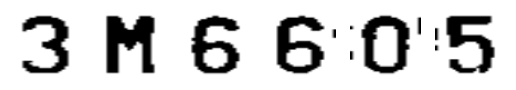

Number of characters segmented: 6


In [30]:
import cv2
import matplotlib.pyplot as plt

# 字符分割函數
def segment_characters(image_path, padding=10):
    # 讀取圖像並轉為灰階
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        raise FileNotFoundError(f"Cannot load image at path: {image_path}")
    
    # 自適應二值化
    _, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # 尋找輪廓
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # 篩選適當的輪廓
    char_contours = []
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        if 10 < w < 150 and 30 < h < 200:  # 調整篩選條件以適應字符大小
            char_contours.append((x, y, w, h))
    
    # 將輪廓根據 x 座標排序
    char_contours = sorted(char_contours, key=lambda x: x[0])
    
    # 分割字符並顯示
    characters = []
    for i, (x, y, w, h) in enumerate(char_contours):
        # 向外擴展邊界
        x_expanded = max(x - padding, 0)
        y_expanded = max(y - padding, 0)
        w_expanded = min(w + 2 * padding, binary.shape[1] - x_expanded)
        h_expanded = min(h + 2 * padding, binary.shape[0] - y_expanded)
        
        # 提取字符區域
        char_image = binary[y_expanded:y_expanded+h_expanded, x_expanded:x_expanded+w_expanded]
        
        # 調整大小並反轉顏色
        resized_char = cv2.resize(char_image, (64, 64))
        inverted_char = cv2.bitwise_not(resized_char)  # 反轉黑白
        characters.append(inverted_char)
        
        # 顯示分割的字符
        plt.subplot(1, len(char_contours), i + 1)
        plt.imshow(inverted_char, cmap='gray')
        plt.axis('off')

    plt.show()
    return characters

# 測試字符分割
plate_image_path = 'assember8.jpg'  # 替換為車牌圖像的路徑
characters = segment_characters(plate_image_path, padding=4)  # 設定向外擴展的邊界
print(f"Number of characters segmented: {len(characters)}")


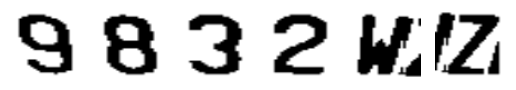

Segmented characters saved to output_segment
Number of characters segmented: 6


In [41]:
import cv2
import os
import matplotlib.pyplot as plt

# 確保保存分割結果的資料夾存在
output_dir = "output_segment"
os.makedirs(output_dir, exist_ok=True)

# 字符分割函數
def segment_characters(image_path, padding=10):
    # 讀取圖像並轉為灰階
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        raise FileNotFoundError(f"Cannot load image at path: {image_path}")
    
    # 自適應二值化
    _, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # 尋找輪廓
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # 篩選適當的輪廓
    char_contours = []
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        if 10 < w < 150 and 30 < h < 200:  # 調整篩選條件以適應字符大小
            char_contours.append((x, y, w, h))
    
    # 將輪廓根據 x 座標排序
    char_contours = sorted(char_contours, key=lambda x: x[0])
    
    # 分割字符並保存
    characters = []
    base_filename = os.path.splitext(os.path.basename(image_path))[0]
    for i, (x, y, w, h) in enumerate(char_contours):
        # 向外擴展邊界
        x_expanded = max(x - padding, 0)
        y_expanded = max(y - padding, 0)
        w_expanded = min(w + 2 * padding, binary.shape[1] - x_expanded)
        h_expanded = min(h + 2 * padding, binary.shape[0] - y_expanded)
        
        # 提取字符區域
        char_image = binary[y_expanded:y_expanded+h_expanded, x_expanded:x_expanded+w_expanded]
        
        # 調整大小並反轉顏色
        resized_char = cv2.resize(char_image, (64, 64))
        inverted_char = cv2.bitwise_not(resized_char)  # 反轉黑白
        characters.append(inverted_char)
        
        # 保存圖像
        output_path = os.path.join(output_dir, f"{base_filename}_char_{i:02d}.jpg")
        cv2.imwrite(output_path, inverted_char)
    
        # 顯示分割的字符
        plt.subplot(1, len(char_contours), i + 1)
        plt.imshow(inverted_char, cmap='gray')
        plt.axis('off')

    plt.show()
    print(f"Segmented characters saved to {output_dir}")
    return characters

# 測試字符分割
plate_image_path = 'assember8.jpg'  # 替換為車牌圖像的路徑
characters = segment_characters(plate_image_path, padding=3)  # 設定向外擴展的邊界
print(f"Number of characters segmented: {len(characters)}")
